In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data\Battery_Testing_Data.csv")
Dff = pd.read_csv("Data\SOC_OCV_MFCTT_2019.csv",sep = "\t") 



In [3]:
df.head()

,Time (s),Current (mA),Voltage (V),Temperature
0,NaN,NaN,NaN,NaN
1,1.0,0.0,4.05,21.96
2,2.0,0.0,4.05,21.94
3,3.0,0.0,4.05,21.94
4,4.0,0.0,4.05,21.93


Plot the Voltages as a function of the SOC

In [4]:
Dff.head()
# SOC data - OCV as a function of SOC , very slow discharge

,SOC,Ecell/V
0,100.000000,4.186240
1,99.998926,4.186390
2,99.997852,4.186268
3,99.996778,4.186108
4,99.995704,4.186100


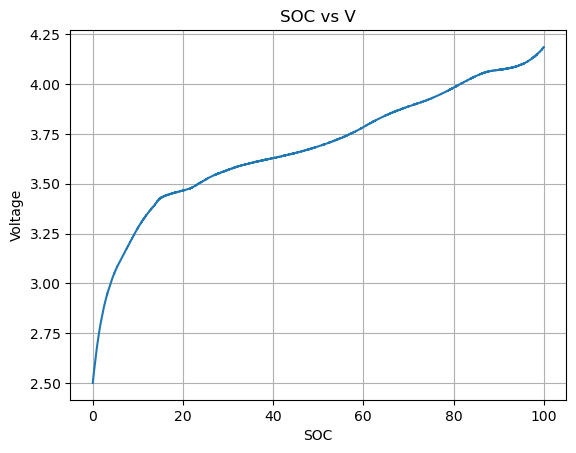

In [27]:
plt.figure()
plt.plot(Dff['SOC'],Dff['Ecell/V'])
plt.title('SOC vs V')
plt.xlabel("SOC")
plt.grid()
plt.ylabel("Voltage")
plt.show()

Plot the Experimental Voltage as a function of time 

In [10]:
df.head()

,Time (s),Current (mA),Voltage (V),Temperature
0,NaN,NaN,NaN,NaN
1,1.0,0.0,4.05,21.96
2,2.0,0.0,4.05,21.94
3,3.0,0.0,4.05,21.94
4,4.0,0.0,4.05,21.93


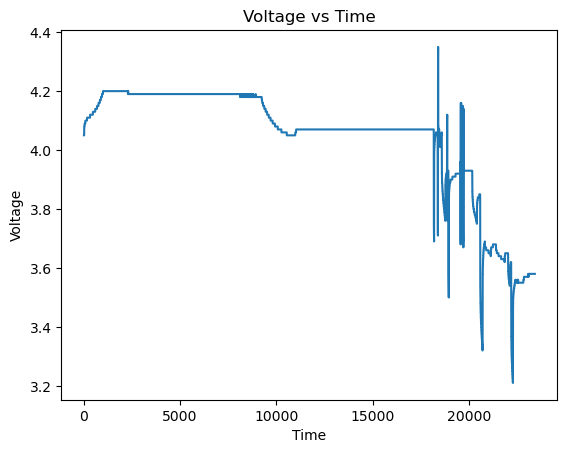

In [11]:
T = df['Time (s)']
Cur = df['Current (mA)']
Volt = df['Voltage (V)']
Temp = df['Temperature']
plt.figure()
plt.plot(T,Volt)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Voltage vs Time")
plt.show()

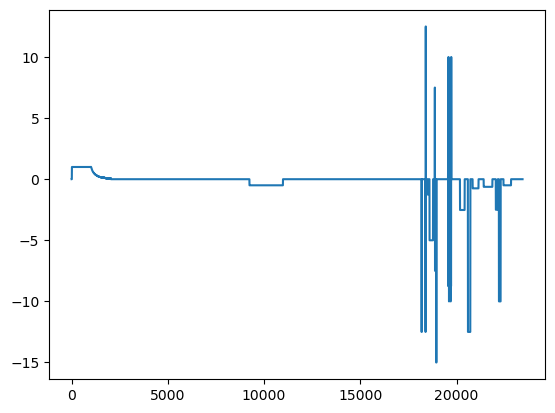

In [55]:
plt.plot(T,Cur/1000)

- Initial constant current charge up to maximum voltage followed by constant voltage hold
- Which part is our discharge?

Zoom on the disharge

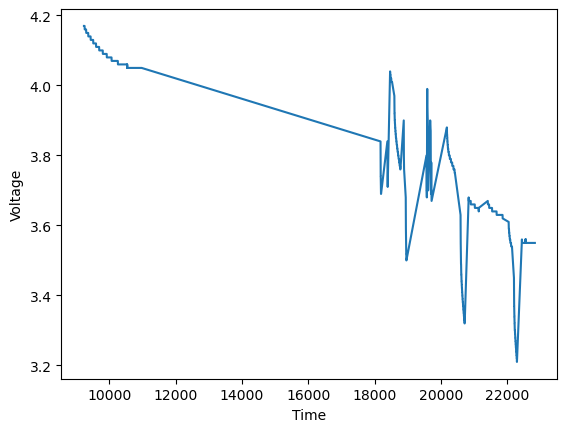

9238.0 4.17


In [42]:
Tclean = []
Voltc = []
Curc = []
# Only negative current - discharge data
for k in range(len(T)) :
    if Cur[k] < 0 :
        Tclean.append(T[k])
        Voltc.append(Volt[k])
        Curc.append(Cur[k])
        
plt.figure()
plt.plot(Tclean,Voltc)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.show()
print(Tclean[0],Voltc[0])

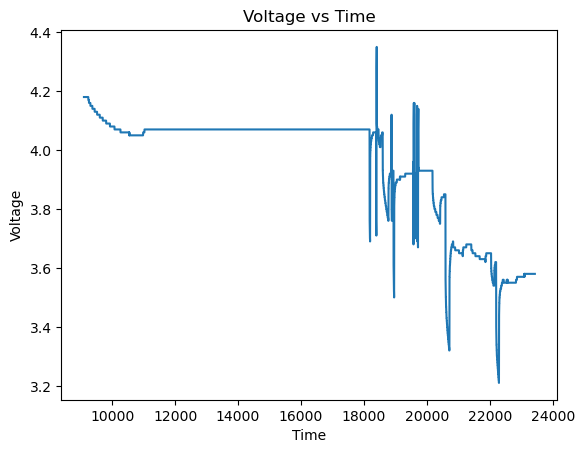

In [47]:
idx = 9100
plt.plot(T[idx:],Volt[idx:])
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("Voltage vs Time")
plt.show()

Predicted SOC using coulomb technique 

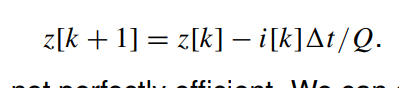

In [64]:
Cur.max()

12500.0

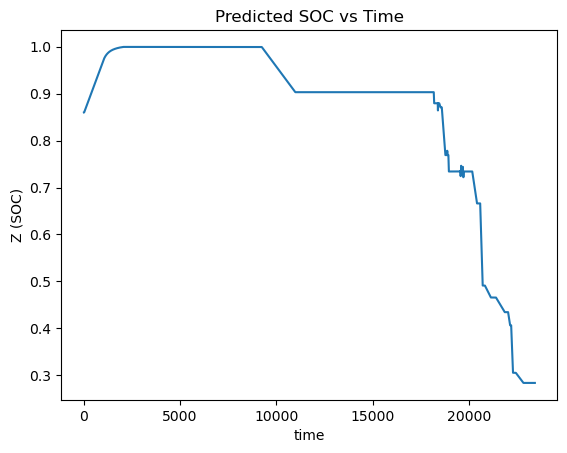

In [50]:
Z = [0.86] # is this our starting SOC?
Cur[0]=0
for k in range(len(T)-1) :
    Z.append(Z[k]+Cur[k]*(1/2500)/3600)

plt.figure()
plt.plot(T,Z)
plt.ylabel("Z (SOC)")
plt.xlabel("time")
plt.title("Predicted SOC vs Time")
plt.show()

In [53]:
Dff.SOC[9100]

90.22531725

Get voltage at 50% soc

In [32]:
R = 0.08/5 # Why this value - Is this from the battery spec sheet graph, 1C-5A
Cur = np.array(Cur)
OCV = []

Zmodif = np.round(Dff['SOC'],2)
U = list(Zmodif/100) # Why divide by 100?

for k in range(len(Cur)) :
    z = Z[k]
    z = np.round(z,2)
    
    OCV.append(Dff['Ecell/V'][U.index(z)])
    
        
Voltpredict = R*Cur/1000+OCV


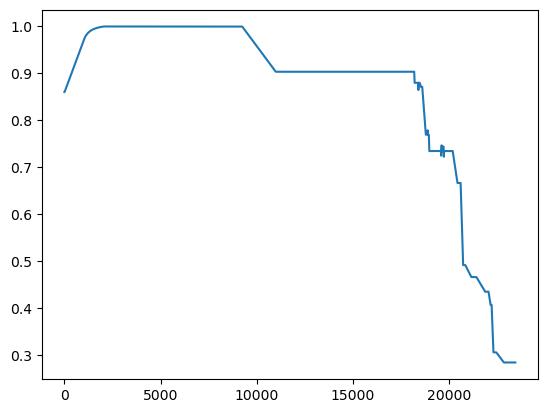

In [62]:
plt.plot(T,Z)

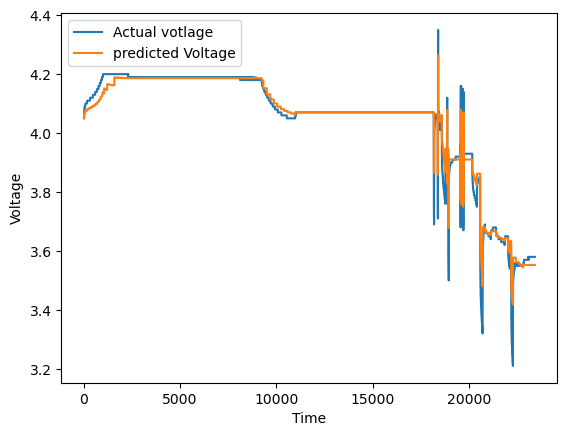

In [35]:
plt.figure()
plt.plot(T,Volt, label = "Actual voltage")
plt.plot(T,Voltpredict, label="predicted Voltage")
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.legend()
plt.show()

Text(0, 0.5, 'Current')

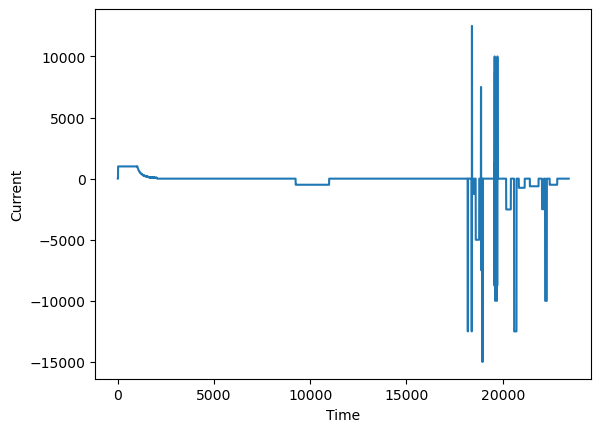

In [34]:
plt.plot(T,Cur)
plt.xlabel("Time")
plt.ylabel("Current")

ploting the absolute error 

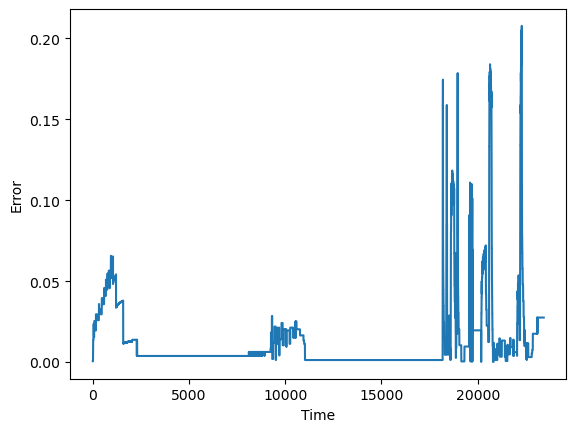

In [36]:
Error = []
for k in range(len(T)):
    Error.append(np.abs(Volt[k] - Voltpredict[k]))
plt.figure()
plt.plot(T,Error)
plt.xlabel("Time")
plt.ylabel("Error")
plt.show()

plotting the relative error (%)

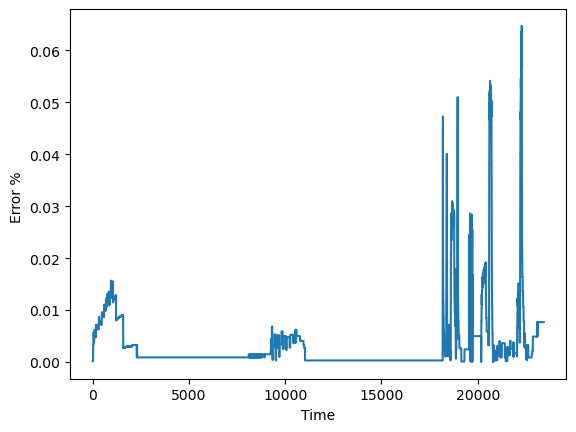

In [38]:
Error = []
for k in range(len(T)):
    Error.append(np.abs(Volt[k] - Voltpredict[k])/Volt[k])
plt.figure()
plt.plot(T,Error)
plt.xlabel("Time")
plt.ylabel("Error % ")
plt.show()